In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Metropolis Within Gibbs: Independent

In [3]:
# Defining variables
n = 30; C, G, = 2, 10000
mu_0, sd_0 = 0, 1             # Tighter proposal for theta
alpha_0, lambda_0 = 0.6, 0.6  # Align tau proposal with posterior

# Normal model for the data (likelihood) 
data = stats.norm(loc=0, scale=1).rvs(n)

# Initialize 2D arrays of zeros for theta and tau with shape (C, G)
theta, tau = np.zeros([C, G]), np.zeros([C, G])

theta[:, 0] = 0  # Inialize a value of theta
tau[:, 0] = 1
lst = []
lst2 = []
for c in range(C):
    for g in range(1, G):
        # Full Conditional Sampling for Tau
        target_tau = lambda tau_: np.prod(stats.norm(loc=theta[c, g-1], scale=1/(tau_)**0.5).pdf(data))*stats.gamma(a=alpha_0, scale=lambda_0).pdf(tau_)
        proposal_tau = stats.gamma(a=2*alpha_0, scale=2*lambda_0)
        
        tilde_tau = proposal_tau.rvs()
        
        mhp1 = ((target_tau(tilde_tau))/(target_tau(tau[c, g-1])))*((proposal_tau.pdf(tau[c, g-1]))/(proposal_tau.pdf(tilde_tau)))
        lst2.append([target_tau(tilde_tau), target_tau(tau[c, g-1]), proposal_tau.pdf(tau[c, g-1]), proposal_tau.pdf(tilde_tau)])
        mhap1 = min(1, mhp1)
        
        if stats.uniform().rvs() < mhap1:
            tau[c, g] = tilde_tau
        else:
            tau[c, g] = tau[c, g-1]
        
        # Full Conditional Sampling for Theta
        target_theta = lambda theta_: np.prod(stats.norm(loc=theta_, scale=1/(tau[c, g])**0.5).pdf(data))*stats.norm(loc=mu_0, scale=sd_0).pdf(theta_)
        proposal_theta = stats.norm(loc=mu_0, scale=sd_0)
        
        tilde_theta = proposal_theta.rvs()
          
        mhp2 = ((target_theta(tilde_theta))/(target_theta(theta[c, g-1])))*((proposal_theta.pdf(theta[c, g-1]))/(proposal_theta.pdf(tilde_theta)))
        lst.append([mhp1, tilde_tau, mhp2, tilde_theta])
        mhap2 = min(1, mhp2)
        
        if stats.uniform().rvs() < mhap2:
            theta[c, g] = tilde_theta
        else:
            theta[c, g] = theta[c, g-1]
        

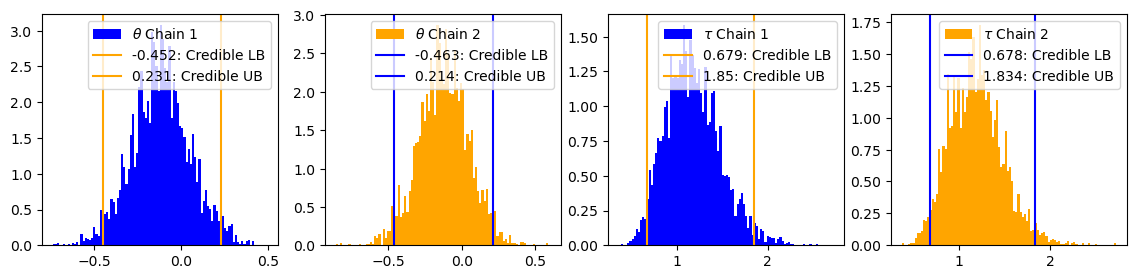

In [4]:
# Plotting 2 histograms for each chain of theta and tau:
fig,ax = plt.subplots(1, 4, figsize=(14,3))

# Theta histograms
ax[0].hist(theta[0, :], bins = 100, density = True, color='blue', label="$\\theta$ Chain 1")
c_1 = np.quantile(theta[0, :], [0.025, 0.975]).tolist()
ax[0].axvline(x=c_1[0], color='orange', label = f'{round(c_1[0], 3)}: Credible LB')
ax[0].axvline(x=c_1[1], color='orange', label = f'{round(c_1[1], 3)}: Credible UB')

ax[1].hist(theta[1, :], bins = 100, density = True, color='orange', label="$\\theta$ Chain 2")
c_2 = np.quantile(theta[1, :], [0.025, 0.975]).tolist()
ax[1].axvline(x=c_2[0], color='blue', label = f'{round(c_2[0], 3)}: Credible LB')
ax[1].axvline(x=c_2[1], color='blue', label = f'{round(c_2[1], 3)}: Credible UB')

# Tau histograms
ax[2].hist(tau[0, :], bins = 100, density = True, color='blue', label="$\\tau$ Chain 1")
c_3 = np.quantile(tau[0, :], [0.025, 0.975]).tolist()
ax[2].axvline(x=c_3[0], color='orange', label = f'{round(c_3[0], 3)}: Credible LB')
ax[2].axvline(x=c_3[1], color='orange', label = f'{round(c_3[1], 3)}: Credible UB')

ax[3].hist(tau[1, :], bins = 100, density = True, color='orange', label="$\\tau$ Chain 2")
c_4 = np.quantile(tau[1, :], [0.025, 0.975]).tolist()
ax[3].axvline(x=c_4[0], color='blue', label = f'{round(c_4[0], 3)}: Credible LB')
ax[3].axvline(x=c_4[1], color='blue', label = f'{round(c_4[1], 3)}: Credible UB')

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()

# Question 2: Metropolis Within Gibbs Depedendent Case

In [5]:
# Defining variables
n = 30; C, G, = 2, 10000
mu_0, sd_0 = 0, 1             # Tighter proposal for theta
alpha_0, lambda_0 = 0.6, 0.6  # Align tau proposal with posterior

# Normal model for the data (likelihood) 
data = stats.norm(loc=0, scale=1).rvs(n)

# Initialize 2D arrays of zeros for theta and tau with shape (C, G)
theta, tau = np.zeros([C, G]), np.zeros([C, G])

theta[:, 0] = 0  # Inialize a value of theta
tau[:, 0] = 1
lst = []
lst2 = []
for c in range(C):
    for g in range(1, G):
        # Full Conditional Sampling for Tau
        target_tau = lambda tau_: np.prod(stats.norm(loc=theta[c, g-1], scale=1/(tau_)**0.5).pdf(data))*stats.gamma(a=alpha_0, scale=lambda_0).pdf(tau_)
        proposal_tau = stats.truncnorm(a=-tau[c, g-1]/sd_0, b=np.inf, loc=tau[c, g-1], scale=sd_0)
        
        tilde_tau = proposal_tau.rvs()
        
        mhp1 = ((target_tau(tilde_tau))/(target_tau(tau[c, g-1])))*((proposal_tau.pdf(tau[c, g-1]))/(proposal_tau.pdf(tilde_tau)))
        lst2.append([target_tau(tilde_tau), target_tau(tau[c, g-1]), proposal_tau.pdf(tau[c, g-1]), proposal_tau.pdf(tilde_tau)])
        mhap1 = min(1, mhp1)
        
        if stats.uniform().rvs() < mhap1:
            tau[c, g] = tilde_tau
        else:
            tau[c, g] = tau[c, g-1]
        
        # Full Conditional Sampling for Theta
        target_theta = lambda theta_: np.prod(stats.norm(loc=theta_, scale=1/(tau[c, g])**0.5).pdf(data))*stats.norm(loc=mu_0, scale=sd_0).pdf(theta_)
        proposal_theta = stats.cauchy(loc=mu_0, scale=sd_0)
        
        tilde_theta = proposal_theta.rvs()
          
        mhp2 = ((target_theta(tilde_theta))/(target_theta(theta[c, g-1])))*((proposal_theta.pdf(theta[c, g-1]))/(proposal_theta.pdf(tilde_theta)))
        lst.append([mhp1, tilde_tau, mhp2, tilde_theta])
        mhap2 = min(1, mhp2)
        
        if stats.uniform().rvs() < mhap2:
            theta[c, g] = tilde_theta
        else:
            theta[c, g] = theta[c, g-1]
        

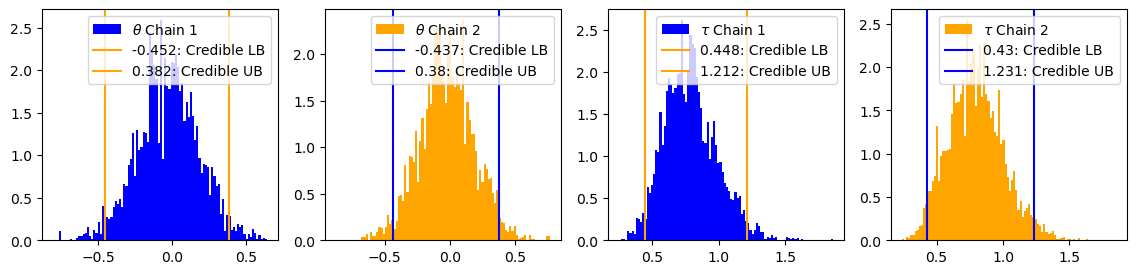

In [6]:
# Plotting 2 histograms for each chain of theta and tau:
fig,ax = plt.subplots(1, 4, figsize=(14,3))

# Theta histograms
ax[0].hist(theta[0, :], bins = 100, density = True, color='blue', label="$\\theta$ Chain 1")
c_1 = np.quantile(theta[0, :], [0.025, 0.975]).tolist()
ax[0].axvline(x=c_1[0], color='orange', label = f'{round(c_1[0], 3)}: Credible LB')
ax[0].axvline(x=c_1[1], color='orange', label = f'{round(c_1[1], 3)}: Credible UB')

ax[1].hist(theta[1, :], bins = 100, density = True, color='orange', label="$\\theta$ Chain 2")
c_2 = np.quantile(theta[1, :], [0.025, 0.975]).tolist()
ax[1].axvline(x=c_2[0], color='blue', label = f'{round(c_2[0], 3)}: Credible LB')
ax[1].axvline(x=c_2[1], color='blue', label = f'{round(c_2[1], 3)}: Credible UB')

# Tau histograms
ax[2].hist(tau[0, :], bins = 100, density = True, color='blue', label="$\\tau$ Chain 1")
c_3 = np.quantile(tau[0, :], [0.025, 0.975]).tolist()
ax[2].axvline(x=c_3[0], color='orange', label = f'{round(c_3[0], 3)}: Credible LB')
ax[2].axvline(x=c_3[1], color='orange', label = f'{round(c_3[1], 3)}: Credible UB')

ax[3].hist(tau[1, :], bins = 100, density = True, color='orange', label="$\\tau$ Chain 2")
c_4 = np.quantile(tau[1, :], [0.025, 0.975]).tolist()
ax[3].axvline(x=c_4[0], color='blue', label = f'{round(c_4[0], 3)}: Credible LB')
ax[3].axvline(x=c_4[1], color='blue', label = f'{round(c_4[1], 3)}: Credible UB')

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()

# Question 2: Final Part
Provide a demonstration showing the Bayesian inference provided by this sampler. Then discuss the necessity (or lackthereof) of analytically determining the full conditional distributions when performing Gibbs sampling. 

There is no necessity to have an analytical expression to determine the full conditional since we could use a Metropolis-Hastings algorithm to sample from this distribution, where the full conditional is our target distribution. However, there are important considerations. Firstly, we need to consider the transition distribution in the algorithm when it has converged to the target. In other words, we must discard the burn-in period. In addition, we need to consider the limitation that we now have a dependent sample. However, overall, there is no need for an analytical distribution for a full conditional since, ultimately, we will trade an analytical distribution for a histogram.

# Question 3:

I unfortunatly did not have enough time to complete this. 